1. impute blank values
2. drop outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
option_train = pd.read_csv("/content/drive/MyDrive/DSO_530_Spring_2023/Final Project/option_train.csv"); option_train.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [4]:
option_train.dtypes

Value    float64
S        float64
K        float64
tau      float64
r        float64
BS        object
dtype: object

In [5]:
numeric = ['Value', 'S', 'K', 'tau', 'r']
categorical = ['BS']

In [6]:
categorical_data = option_train.loc[:, categorical]
populated_cat = categorical_data.notna().mean()
zeros_cat = (categorical_data[categorical] == '0') | (categorical_data[categorical] == 0)
blank_cat = categorical_data.isnull()
unique_cat = categorical_data.nunique(axis = 0)
mode_cat = categorical_data.mode().iloc[0,:]

summary_cat = pd.DataFrame(data = {'% populated': (populated_cat*100).round(2), '# blank': blank_cat.sum(),
                               '# zeros': zeros_cat.sum(), '# unique values': unique_cat.round(2), 'most common value': mode_cat})

summary_cat['# unique values'] = summary_cat['# unique values'].apply(lambda x: '{:,}'.format(x))
summary_cat.index.name = 'Field Name'
summary_cat

,% populated,# blank,# zeros,# unique values,most common value
Field Name,,,,,
BS,100.0,0,0,2,Under


In [7]:
numerical_data = option_train.loc[:, numeric]
populated_num = numerical_data.notna().mean()
zeros_num = (numerical_data[numeric] == '0') | (numerical_data[numeric] == 0)
blank_num = numerical_data.isnull()
unique_num = numerical_data.nunique(axis = 0)
mode_num = numerical_data.mode().iloc[0,:]

summary_num = pd.DataFrame(data = {'% populated': (populated_num*100).round(2), '# blank': blank_num.sum(),
                               '# zeros': zeros_num.sum(), '# unique values': unique_num.round(2), 'most common value': mode_num})

summary_num['# unique values'] = summary_num['# unique values'].apply(lambda x: '{:,}'.format(x))
summary_num.index.name = 'Field Name'
summary_num

,% populated,# blank,# zeros,# unique values,most common value
Field Name,,,,,
Value,99.88,2,0,"1,623",0.190000
S,99.94,1,1,201,444.358726
K,99.88,2,0,25,440.000000
tau,99.94,1,0,87,0.261905
r,100.00,0,0,20,0.029620


In [8]:
option_train.describe()

,Value,S,K,tau,r
count,1678.000000,1679.000000,1678.000000,1679.000000,1680.000000
mean,15.068709,464.402535,438.241955,0.437519,0.030235
std,14.040023,973.652179,23.408989,7.057555,0.000557
min,0.125000,0.000000,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.634081,440.000000,0.202381,0.030130
75%,25.747434,447.320414,455.000000,0.285714,0.030540
max,60.149367,40333.000000,500.000000,250.000000,0.031880


In [9]:
option_train["BS_dummy"] = (option_train["BS"] == "Over").astype(int)

In [10]:
option_train

,Value,S,K,tau,r,BS,BS_dummy
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0
...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over,1
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under,0
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under,0
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over,1


In [11]:
option_train.dtypes

Value       float64
S           float64
K           float64
tau         float64
r           float64
BS           object
BS_dummy      int64
dtype: object

**Imputation**

**Values = Current Option Values**: Two blank values

In [12]:
option_train[option_train["Value"].isnull()]

,Value,S,K,tau,r,BS,BS_dummy
53,NaN,446.718974,430.0,0.166667,0.02962,Under,0
818,NaN,431.284616,NaN,0.230159,0.02972,Over,1


In [13]:
x_1 = option_train.iloc[(53,3)]
y_1 = option_train.iloc[(53,4)]

In [14]:
filter_value = option_train.loc[(option_train['tau'] == x_1) & (option_train['r'] == y_1)]
value_imputed_1 = filter_value['Value'].mean()
value_imputed_1

16.110577248777776

In [15]:
option_train.iloc[(53,0)] = value_imputed_1

In [16]:
option_train.iloc[(53,0)]

16.110577248777776

In [17]:
option_train[option_train["Value"].isnull()]

,Value,S,K,tau,r,BS,BS_dummy
818,NaN,431.284616,NaN,0.230159,0.02972,Over,1


In [18]:
x_2 = option_train.iloc[(818,3)]
y_2 = option_train.iloc[(818,4)]

In [19]:
filter_value_2 = option_train.loc[(option_train['tau'] == x_2) & (option_train['r'] == y_2)]
value_imputed_2 = filter_value_2['Value'].mean()
value_imputed_2

8.560916655166666

In [20]:
option_train.iloc[(818,0)] = value_imputed_2

In [21]:
option_train.iloc[(818,0)]

8.560916655166666

In [22]:
option_train[option_train["Value"].isnull()]

,Value,S,K,tau,r,BS,BS_dummy


We grouped tau, K, and r into one group of asset and impute the blank values using the average Value of that particular group of asset.

**S = Current Asset Value**: One blank value and one zero value

Depends on tau and r

In [23]:
# replace the zero values with NaN
option_train['S'] = option_train['S'].replace({0:np.nan})

In [24]:
option_train[option_train["S"].isnull()]

,Value,S,K,tau,r,BS,BS_dummy
292,8.625,NaN,NaN,NaN,0.03003,Over,1
879,4.125,NaN,455.0,0.170635,0.03003,Over,1


We do not have info. on tau as well for the first blank values, so we will drop this value (later)

In [25]:
option_train.shape

(1680, 7)

In [26]:
x_3 = option_train.iloc[(879,3)]
y_3 = option_train.iloc[(879,4)]

In [27]:
filter_value_3 = option_train.loc[(option_train['tau'] == x_3) & (option_train['r'] == y_3)]
value_imputed_3 = filter_value_3['S'].mean()
value_imputed_3

448.0150228

In [28]:
option_train.iloc[(879,1)] = value_imputed_3
option_train.iloc[(879,1)]

448.0150228

In [29]:
option_train[option_train["S"].isnull()] # we will drop this value later

,Value,S,K,tau,r,BS,BS_dummy
292,8.625,NaN,NaN,NaN,0.03003,Over,1


In [30]:
option_train.describe()

,Value,S,K,tau,r,BS_dummy
count,1680.000000,1679.000000,1678.000000,1679.000000,1680.000000,1680.000000
mean,15.065455,464.669369,438.241955,0.437519,0.030235,0.436905
std,14.032580,973.586219,23.408989,7.057555,0.000557,0.496151
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000
25%,2.255003,433.875313,420.000000,0.119048,0.029820,0.000000
50%,11.190967,442.634081,440.000000,0.202381,0.030130,0.000000
75%,25.744375,447.320414,455.000000,0.285714,0.030540,1.000000
max,60.149367,40333.000000,500.000000,250.000000,0.031880,1.000000


**K = Strike price of option** = two blank values

In [31]:
option_train[option_train["K"].isnull()]

,Value,S,K,tau,r,BS,BS_dummy
292,8.625000,NaN,NaN,NaN,0.03003,Over,1
818,8.560917,431.284616,NaN,0.230159,0.02972,Over,1


We do not have info. on tau as well for the first blank values, so we will drop this value (later)

In [32]:
import math

In [33]:
x_4 = option_train.iloc[(818,3)]
y_4 = option_train.iloc[(818,4)]

In [34]:
filter_value_4 = option_train.loc[(option_train['tau'] == x_4) & (option_train['r'] == y_4)]
value_imputed_4 = math.floor(filter_value_4['K'].mean())
value_imputed_4

440

In [35]:
option_train.iloc[(818,2)] = value_imputed_4
option_train.iloc[(818,2)]

440.0

In [36]:
option_train[option_train["S"].isnull()] # we will drop this value later

,Value,S,K,tau,r,BS,BS_dummy
292,8.625,NaN,NaN,NaN,0.03003,Over,1


In [37]:
option_train.describe()

,Value,S,K,tau,r,BS_dummy
count,1680.000000,1679.000000,1679.000000,1679.000000,1680.000000,1680.000000
mean,15.065455,464.669369,438.243002,0.437519,0.030235,0.436905
std,14.032580,973.586219,23.402052,7.057555,0.000557,0.496151
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000
25%,2.255003,433.875313,420.000000,0.119048,0.029820,0.000000
50%,11.190967,442.634081,440.000000,0.202381,0.030130,0.000000
75%,25.744375,447.320414,455.000000,0.285714,0.030540,1.000000
max,60.149367,40333.000000,500.000000,250.000000,0.031880,1.000000


**Values Dropping**

In [38]:
option_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Value     1680 non-null   float64
 1   S         1679 non-null   float64
 2   K         1679 non-null   float64
 3   tau       1679 non-null   float64
 4   r         1680 non-null   float64
 5   BS        1680 non-null   object 
 6   BS_dummy  1680 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 92.0+ KB


In [39]:
option_train.iloc[(292)]

Value         8.625
S               NaN
K               NaN
tau             NaN
r           0.03003
BS             Over
BS_dummy          1
Name: 292, dtype: object

In [40]:
option_train = option_train.dropna()

In [41]:
option_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Value     1679 non-null   float64
 1   S         1679 non-null   float64
 2   K         1679 non-null   float64
 3   tau       1679 non-null   float64
 4   r         1679 non-null   float64
 5   BS        1679 non-null   object 
 6   BS_dummy  1679 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 104.9+ KB


Now, after we dropped one row that contained NaN, we have 1679 rows

**Visualizations**

**Value**

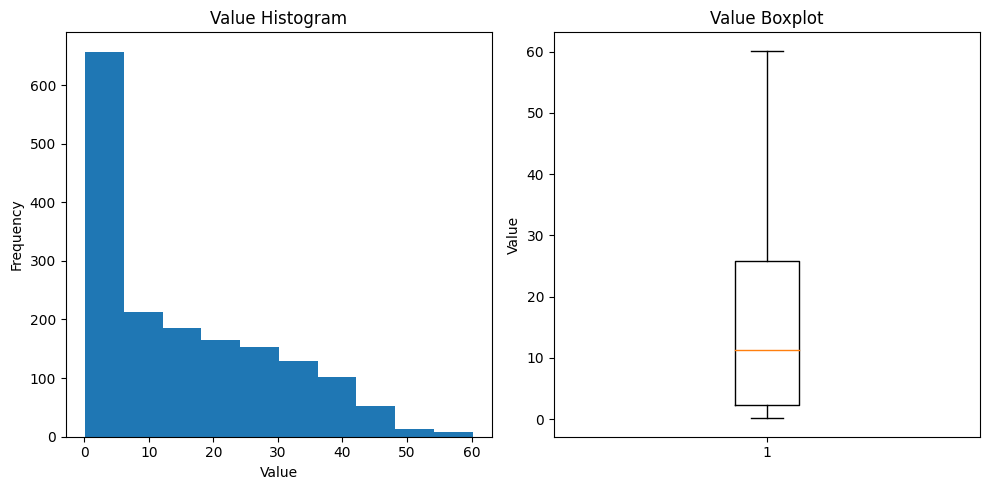

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "Value" column
axs[0].hist(option_train["Value"], bins=10)
axs[0].set_title("Value Histogram")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["Value"])
axs[1].set_title("Value Boxplot")
axs[1].set_ylabel("Value")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

**S**

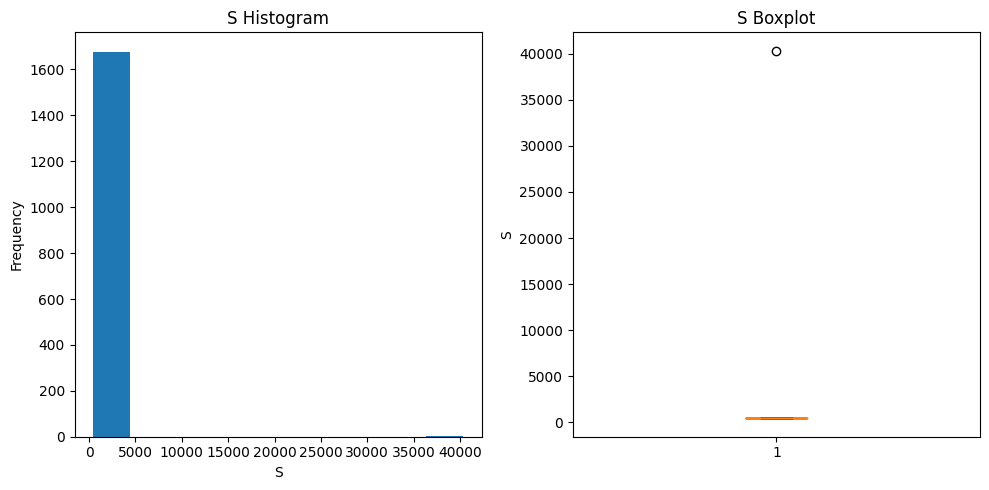

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "S" column
axs[0].hist(option_train["S"], bins=10)
axs[0].set_title("S Histogram")
axs[0].set_xlabel("S")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["S"])
axs[1].set_title("S Boxplot")
axs[1].set_ylabel("S")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

We will drop one outlier, which is the max value of S

In [42]:
max_row = option_train.nlargest(1, 'S')
# Drop the row with the maximum S
option_train = option_train.drop(max_row.index[0])

In [43]:
option_train # now there are 1678 rows

,Value,S,K,tau,r,BS,BS_dummy
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0
...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over,1
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under,0
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under,0
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over,1


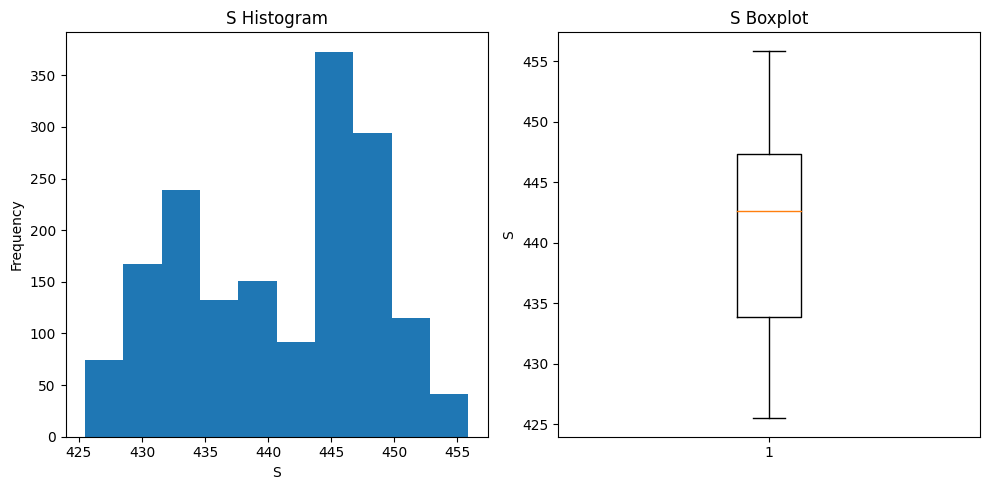

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "S" column
axs[0].hist(option_train["S"], bins=10)
axs[0].set_title("S Histogram")
axs[0].set_xlabel("S")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["S"])
axs[1].set_title("S Boxplot")
axs[1].set_ylabel("S")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

S --> drop 1

**K**

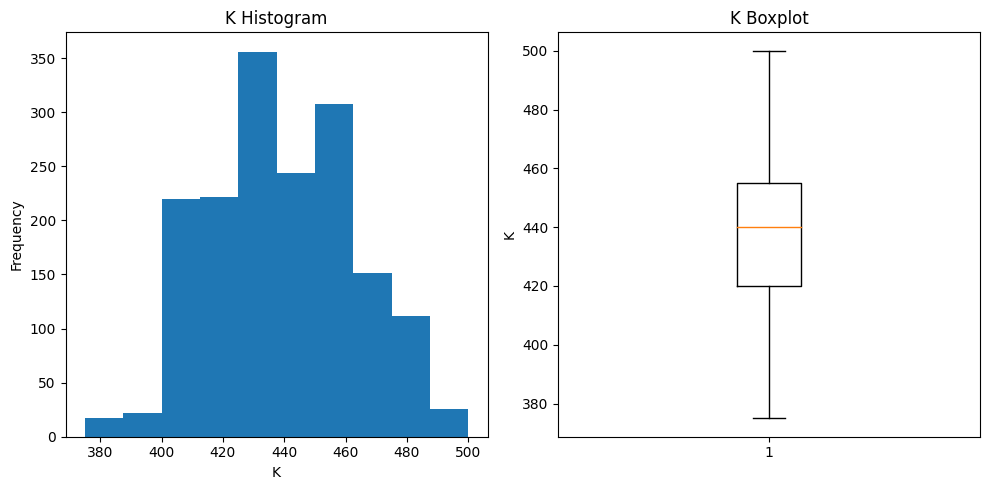

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "K" column
axs[0].hist(option_train["K"], bins=10)
axs[0].set_title("K Histogram")
axs[0].set_xlabel("K")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["K"])
axs[1].set_title("K Boxplot")
axs[1].set_ylabel("K")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

K --> drop 1

**tau**

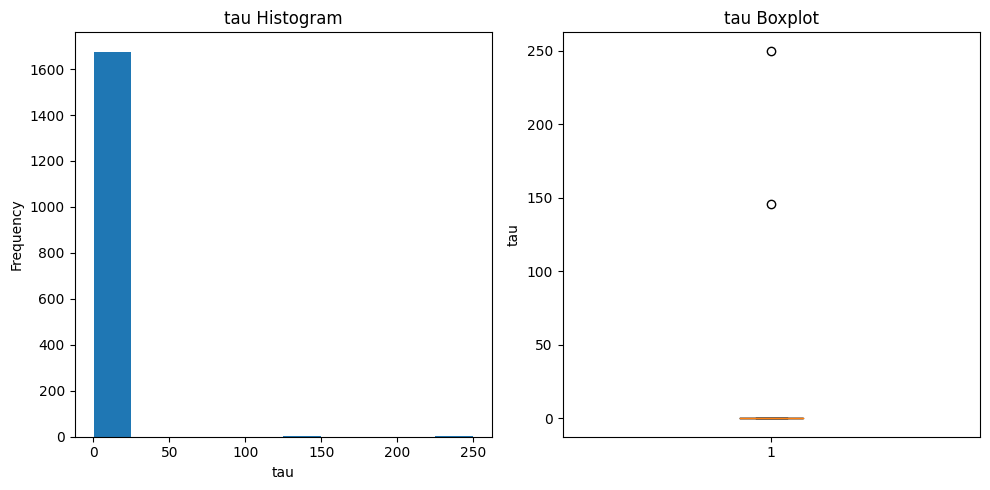

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "tau" column
axs[0].hist(option_train["tau"], bins=10)
axs[0].set_title("tau Histogram")
axs[0].set_xlabel("tau")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["tau"])
axs[1].set_title("tau Boxplot")
axs[1].set_ylabel("tau")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

In [44]:
rows_tau_gt_1 = option_train[option_train["tau"] > 1]
rows_tau_gt_1

,Value,S,K,tau,r,BS,BS_dummy
12,2.315001,448.688109,470.0,250.0,0.03013,Over,1
33,2.565000,445.042240,455.0,146.0,0.03003,Over,1


In [45]:
option_train = option_train.drop(option_train[option_train["tau"] > 1].index)

In [46]:
option_train # now we have 1676 rows

,Value,S,K,tau,r,BS,BS_dummy
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0
...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over,1
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under,0
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under,0
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over,1


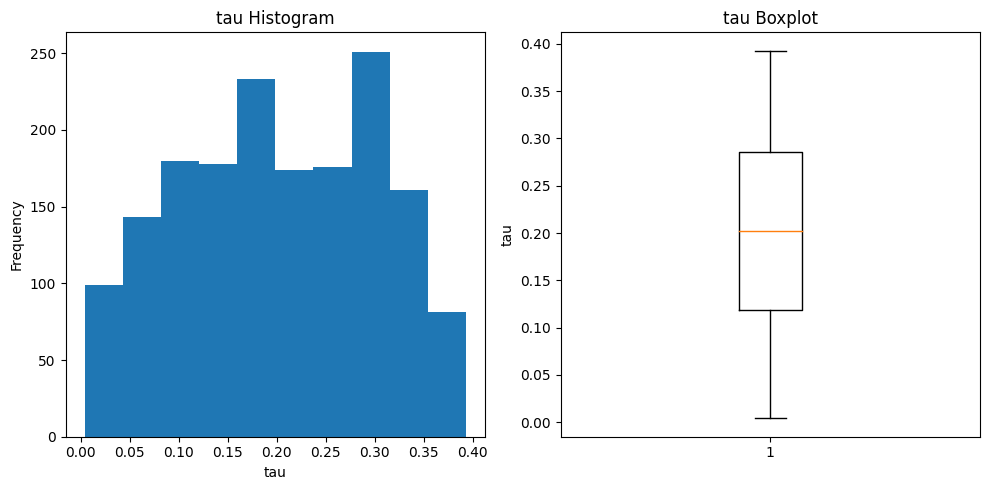

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "tau" column
axs[0].hist(option_train["tau"], bins=10)
axs[0].set_title("tau Histogram")
axs[0].set_xlabel("tau")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["tau"])
axs[1].set_title("tau Boxplot")
axs[1].set_ylabel("tau")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

tau --> drop 2

**r**

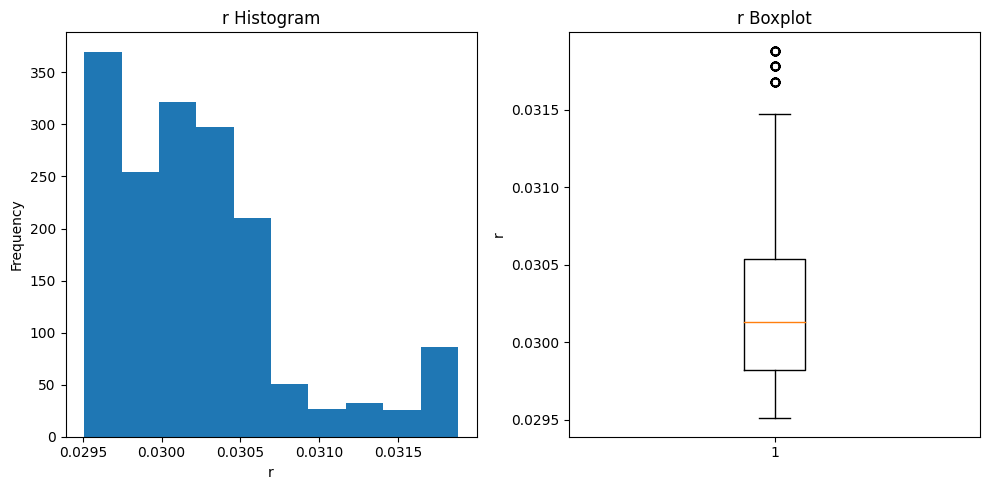

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a histogram of the "r" column
axs[0].hist(option_train["r"], bins=10)
axs[0].set_title("r Histogram")
axs[0].set_xlabel("r")
axs[0].set_ylabel("Frequency")

# Create a boxplot of the "Value" column
axs[1].boxplot(option_train["r"])
axs[1].set_title("r Boxplot")
axs[1].set_ylabel("r")

# Adjust the subplots layout
plt.tight_layout()

# Display the subplots
plt.show()

In [47]:
option_train

,Value,S,K,tau,r,BS,BS_dummy
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0
...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over,1
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under,0
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under,0
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over,1


In [48]:
option_train.describe()

,Value,S,K,tau,r,BS_dummy
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,15.086521,440.902829,438.221957,0.202000,0.030234,0.436158
std,14.041374,7.529351,23.404317,0.099733,0.000557,0.496055
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000
25%,2.246251,433.863864,420.000000,0.119048,0.029820,0.000000
50%,11.235294,442.579723,440.000000,0.202381,0.030130,0.000000
75%,25.766604,447.320414,455.000000,0.285714,0.030540,1.000000
max,60.149367,455.880619,500.000000,0.392857,0.031880,1.000000


**Standardize (Z-scaling)**

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
cols_to_scale = ['S', 'K', 'tau', 'r']

# Create a StandardScaler object and fit it on the selected columns
stdsc = StandardScaler()
scaled_cols = stdsc.fit_transform(option_train[cols_to_scale])

# Create new column names for the standardized columns
scaled_col_names = [col + '_std' for col in cols_to_scale]

# Add the standardized columns to the DataFrame
option_train[scaled_col_names] = scaled_cols

# Display the resulting DataFrame
option_train

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0,-1.232736,-0.778805,1.396842,-0.187526
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1,-1.844973,1.144491,-0.354382,1.841332
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0,-1.745757,-0.992504,0.640632,1.661787
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1,1.435988,0.930792,-1.389195,-0.923660
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0,0.772694,-1.206204,-0.354382,-1.103205
...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over,1,0.464234,1.571890,0.720233,0.189518
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under,0,-0.325358,-1.206204,0.998837,-0.923660
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under,0,-1.708573,-2.061002,-0.314581,2.954511
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over,1,-0.242009,1.785590,0.919236,-1.103205


In [ ]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [51]:
option_train.describe()

,Value,S,K,tau,r,BS_dummy,S_std,K_std,tau_std,r_std
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03
mean,15.086521,440.902829,438.221957,0.202000,0.030234,0.436158,3.953348e-16,-1.084256e-15,-3.285624e-16,2.734487e-16
std,14.041374,7.529351,23.404317,0.099733,0.000557,0.496055,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000,-2.049991e+00,-2.702101e+00,-1.986204e+00,-1.300705e+00
25%,2.246251,433.863864,420.000000,0.119048,0.029820,0.000000,-9.351491e-01,-7.788049e-01,-8.319880e-01,-7.441152e-01
50%,11.235294,442.579723,440.000000,0.202381,0.030130,0.000000,2.227809e-01,7.599340e-02,3.823317e-03,-1.875259e-01
75%,25.766604,447.320414,455.000000,0.285714,0.030540,1.000000,8.525969e-01,7.170921e-01,8.396346e-01,5.486084e-01
max,60.149367,455.880619,500.000000,0.392857,0.031880,1.000000,1.989848e+00,2.640388e+00,1.914249e+00,2.954511e+00


In [52]:
option_train.to_csv("/content/drive/MyDrive/DSO_530_Spring_2023/Final Project/final_option_train_formatted.csv", index=False)